In [25]:
import glob, serial, time, math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from skimage.transform import iradon
from IPython.display import display

In [26]:
ports = glob.glob('/dev/tty[A-Za-z]*') # Modify if on a platform other than Linux
ports

['/dev/ttyACM1',
 '/dev/ttyUSB2',
 '/dev/ttyUSB1',
 '/dev/ttyUSB0',
 '/dev/ttyprintk',
 '/dev/ttyS31',
 '/dev/ttyS30',
 '/dev/ttyS29',
 '/dev/ttyS28',
 '/dev/ttyS27',
 '/dev/ttyS26',
 '/dev/ttyS25',
 '/dev/ttyS24',
 '/dev/ttyS23',
 '/dev/ttyS22',
 '/dev/ttyS21',
 '/dev/ttyS20',
 '/dev/ttyS19',
 '/dev/ttyS18',
 '/dev/ttyS17',
 '/dev/ttyS16',
 '/dev/ttyS15',
 '/dev/ttyS14',
 '/dev/ttyS13',
 '/dev/ttyS12',
 '/dev/ttyS11',
 '/dev/ttyS10',
 '/dev/ttyS9',
 '/dev/ttyS8',
 '/dev/ttyS7',
 '/dev/ttyS6',
 '/dev/ttyS5',
 '/dev/ttyS4',
 '/dev/ttyS3',
 '/dev/ttyS2',
 '/dev/ttyS1',
 '/dev/ttyS0']

In [27]:
ser = serial.Serial(ports[0], 115200)

In [28]:
a_steps = 640 # Steps per revolution - 200 * 80/25
b_steps = 1280 # 160 teeth -> 200*160/25

apos = 0
bpos = 0

read = ''

def step_a(n):
    message = b'a'
    if n < 0:
        n = -n
        message = b'A'
    for i in range(n):
        ser.write(message)
        while ser.in_waiting < 1:
            pass # wait for a response
        read = ser.read_all()
#         print(read)
    return n

def set_a(angle):
    step_coords = int(angle/(2*math.pi) * a_steps) # Angle in radians
    step_a(step_coords - apos)
    return step_coords

def step_b(n):
    message = b'b'
    if n < 0:
        n = -n
        message = b'B'
    for i in range(n):
        ser.write(message)
        while ser.in_waiting < 1:
            pass # wait for a response
        read = ser.read_all()
#         print(read)
    return n

def set_b(angle):
    step_coords = int(angle/(2*math.pi) * b_steps) # Angle in radians
    step_b(step_coords - bpos)
    return step_coords

def read_adc():
    ser.write(b'E')
    while ser.in_waiting < 1:
        pass # wait for a response
    return ser.read_all()

def read_adc16():
    ser.write(b'H')
    while ser.in_waiting < 1:
        pass # wait for a response
    return ser.read_all()

# apos = set_a(0.2) # This is the proper usage to keep track
# print(apos)

We can move the A and B axes with step_a(n_steps) or set_a(angle in radians). A is the inner circle, B the outer.

In [303]:
step_a(30)

30

In [16]:
step_b(300)

300

Let's take one really detailed scan using the B axis to see what our beam shape looks like. 0 to 180 degrees by stepping B 640 times (half a revolution) reading the adc 3 times each position and averaging:

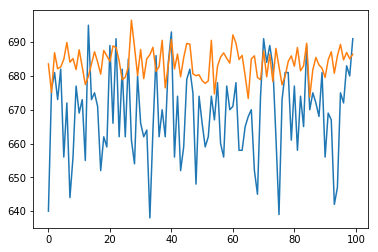

In [304]:
noise = []
s10 = []
for b in range(100):
    val = 0
    for i in range(1):
        val += int(read_adc().strip())
    noise.append(val)
    val2 = 0
    for i in range(1):
        val2 += int(read_adc16().strip())
    s10.append(val2/15)
plt.plot(noise)
plt.plot(s10)

In [305]:
ser.read_all()

b''

A and B are now centered opposite eachother, with the LED opposite the PT

In [70]:
fn = 'sc_test20_n'

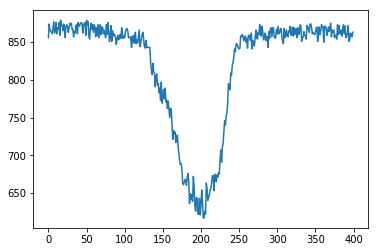

In [65]:
# Taking one set of readings as a baseline (no object)
step_b(-200)
base = []
for b in range(400):
    base.append(int(read_adc().strip()))
    step_b(1)
step_b(-200)
                
plt.plot(base)
b = pd.DataFrame(base)
b.to_csv(fn + 'base.csv', index = False)

In [71]:
# Now, doing these scans from several angles. Doing 32 As (views/thetas), 64 Bs for each A (64 sensors)
from IPython.display import clear_output
readings = []
nv=32
nd = 400 # Hard coded for now
for a in range(nv):
    print(a)
    line = []
    step_b(-200)
    for b in range(400):
        line.append(int(read_adc().strip()))
        step_b(1)
    readings.append(line)
    step_a(int(-640/nv)) # A has 640 steps in 360 degrees.
    step_b(-200) # return to start
    
#     plt.plot(line)
#     plt.show()
    clear_output(wait=True)
    
    time.sleep(1)
    

# We return A to start to ensure we haven't missed steps    
# step_a(-640)  

# Save the scan
d = pd.DataFrame(readings)
d.to_csv(fn+'_' + str(nv) + 'v_' + str(nd) + 'd.csv', index=False)

31


In [67]:
fn

'sc_test20'

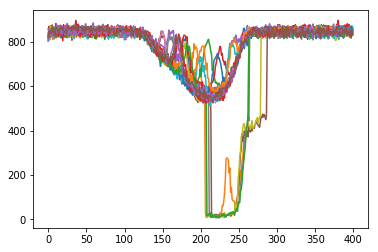

In [169]:
plt.plot(np.asarray(readings).T)

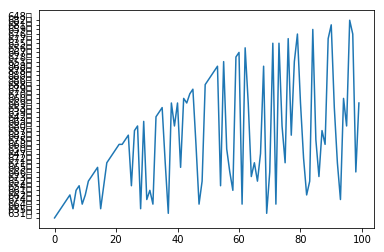

In [286]:
a =[]
for i in range(100):
    a.append(read_adc())
    time.sleep(0.1)
plt.plot(a)

[b'644\r\n', b'667\r\n', b'675\r\n', b'657\r\n', b'664\r\n', b'673\r\n', b'664\r\n', b'668\r\n', b'671\r\n', b'647\r\n']


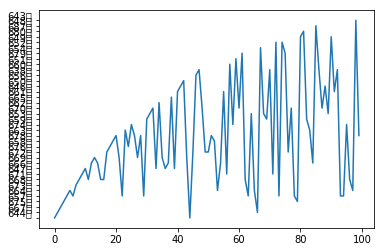

In [293]:
b =[]
for i in range(100):
    b.append(read_adc())
print(b[:10])
plt.plot(b)

In [290]:
a

[b'631\r\n',
 b'655\r\n',
 b'664\r\n',
 b'674\r\n',
 b'662\r\n',
 b'661\r\n',
 b'664\r\n',
 b'654\r\n',
 b'652\r\n',
 b'674\r\n',
 b'661\r\n',
 b'673\r\n',
 b'666\r\n',
 b'665\r\n',
 b'671\r\n',
 b'664\r\n',
 b'652\r\n',
 b'672\r\n',
 b'647\r\n',
 b'650\r\n',
 b'668\r\n',
 b'675\r\n',
 b'675\r\n',
 b'683\r\n',
 b'657\r\n',
 b'652\r\n',
 b'680\r\n',
 b'663\r\n',
 b'664\r\n',
 b'642\r\n',
 b'662\r\n',
 b'654\r\n',
 b'674\r\n',
 b'639\r\n',
 b'653\r\n',
 b'669\r\n',
 b'672\r\n',
 b'655\r\n',
 b'660\r\n',
 b'663\r\n',
 b'660\r\n',
 b'671\r\n',
 b'670\r\n',
 b'660\r\n',
 b'679\r\n',
 b'688\r\n',
 b'675\r\n',
 b'674\r\n',
 b'673\r\n',
 b'886\r\n',
 b'888\r\n',
 b'878\r\n',
 b'868\r\n',
 b'651\r\n',
 b'652\r\n',
 b'678\r\n',
 b'668\r\n',
 b'665\r\n',
 b'654\r\n',
 b'667\r\n',
 b'656\r\n',
 b'674\r\n',
 b'635\r\n',
 b'660\r\n',
 b'666\r\n',
 b'672\r\n',
 b'673\r\n',
 b'650\r\n',
 b'651\r\n',
 b'655\r\n',
 b'665\r\n',
 b'677\r\n',
 b'674\r\n',
 b'677\r\n',
 b'663\r\n',
 b'672\r\n',
 b'676\r\n',

In [526]:
# Now, doing these scans from several angles. Doing 32 As (views/thetas), 64 Bs for each A (64 sensors)
readings = []
for a in range(64):
    line = []
    for b in range(400):
        line.append(int(read_adc16().strip()))
        step_b(1)
    readings.append(line)
    step_a(10) # A has 640 steps in 360 degrees. Scanning from 32 different views
    step_b(-400) # return to start
    print(a)

# We return A to start to ensure we haven't missed steps    
step_a(-640)  

# Save the scan
d = pd.DataFrame(readings)
d.to_csv(fn + '_64v_400d.csv', index=False)

0
1


KeyboardInterrupt: 

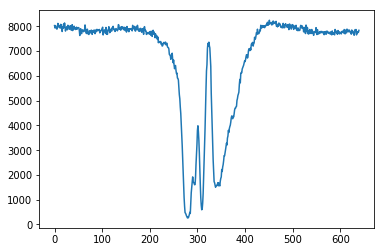

In [410]:
plt.plot(readings[0])

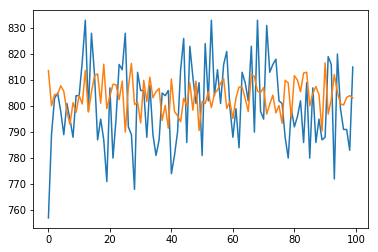

In [418]:
plt.plot(noise)
plt.plot(s10)

In [412]:
n = pd.DataFrame({'A':noise, 'B':s10})

In [416]:
n.describe()

,A,B
count,100.00000,100.000000
mean,800.70000,803.698000
std,15.65183,6.164463
min,757.00000,790.000000
25%,788.75000,800.100000
50%,801.00000,803.900000
75%,813.00000,808.250000
max,833.00000,816.600000


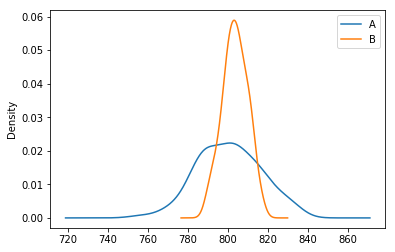

In [417]:
n.plot(kind='density')